# Analysis of Concatenation

Previous studies has shown that the reconstruction is highly sensitive to the sampling capability, and it is not economical to apply high sampling frequency for reconstruction. Hence, based on practical purpose, we suppose that we can generate a modulated signal in a short period (determined by lab purpose) good enough for application.

Previous study gives a fairly good reconstruction for a duration of 250 ns and sampling 10000 times.

### Previous Results

In [237]:
import numpy as np
import matplotlib.pyplot as plt

from CGH_by_GSA import calculate_mse, plot_frequency_domain, Gaussian_Light, main, signal,fourier_transformt,fourier_transform



def spectrum_generation(freqs):
    '''
    Input:
        freqs: ndarray, frequency range for spectrum generation
        
    Output:
        Amplitude: ndarray, Generated Amplitude Spectrum
        Phase: ndarray, Generated Phase Spectrum
    '''
    # Initialization to zeros
    Phase = np.zeros(len(freqs))
    Amplitude = np.zeros(len(freqs))
    Signal_w = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    
    # Default: Supperposition of Four Gaussian Lights 
    Amplitude = 0.4 * Gaussian_Light(0, 30, freqs)
    c = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    Signal_w = [Signal_w[i] + c[i] for i in range(len(freqs))]
    
    Amplitude = Gaussian_Light(600, 30, freqs)
    c = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    Signal_w = [Signal_w[i] + c[i] for i in range(len(freqs))]
    
    Amplitude = Gaussian_Light(-600, 30, freqs)
    c = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    Signal_w = [Signal_w[i] + c[i] for i in range(len(freqs))]
    
    Amplitude = 0.6 * Gaussian_Light(-400, 30, freqs)
    c = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    Signal_w = [Signal_w[i] + c[i] for i in range(len(freqs))]
    
    Amplitude = np.abs(Signal_w)
    Phase = np.angle(Signal_w)
    return Amplitude, Phase

In [288]:
### Regenerate Previous Results

T0 = 1 # Time range
N0 = 100000
  # Number of Sampling points
t0 = np.linspace(0, T0, N0)

num_iterations0 = 200

# Generate frequency range
w0 = np.fft.fftfreq(N0, t0[1]-t0[0])

# Define signal in time Domain
signal_out0,_ = signal(T0, N0)

# Define Target Spectrum
amplitude_spectrum_1, phase_spectrum_1 = spectrum_generation(w0)

In [289]:
t0, amplitude_spectrum0, phase_spectrum0, A_t0, phi_t0, errors0 = main(T0, N0, num_iterations0, amplitude_spectrum_1, phase_spectrum_1, signal_out0)

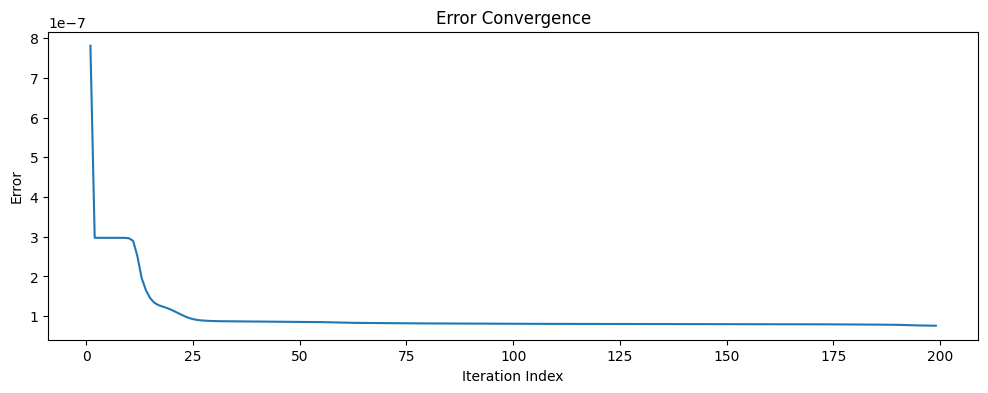

dada


In [290]:
plt.figure(figsize=(12, 4))
plt.plot(list(range(num_iterations0))[1:], errors0[1:])
plt.xlabel('Iteration Index')
plt.ylabel('Error')
plt.title('Error Convergence')
plt.show()
print('dada')

ddd


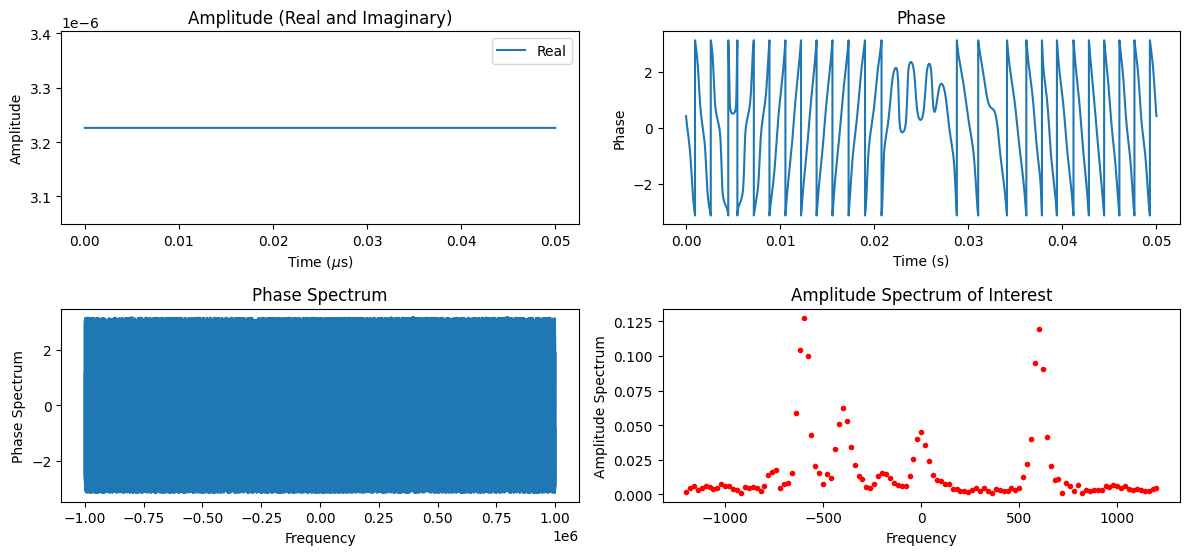

In [291]:
print('ddd')
plot_frequency_domain(w0, t0, A_t0, phi_t0, amplitude_spectrum0, phase_spectrum0)


再尝试生成一个头尾相接的大函数，切片分析

[0.42135577 0.4194877  0.41762237 ... 0.42697645 0.42510013 0.42322658]
[0.0000000e+00 5.0000005e-07 1.0000001e-06 ... 4.9999990e+00 4.9999995e+00
 5.0000000e+00]


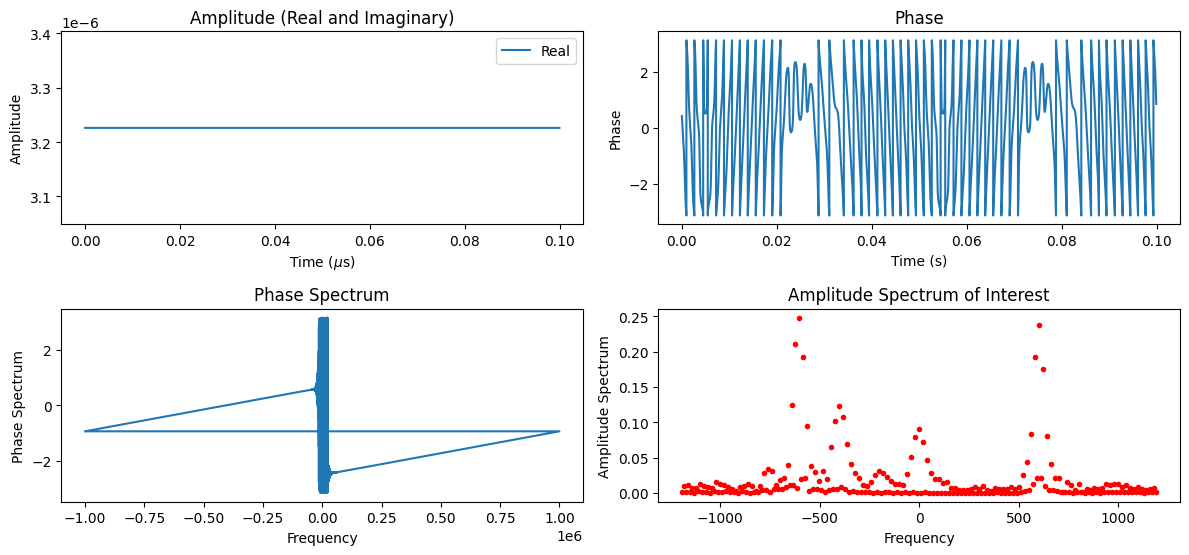

In [299]:
k = 100  # 复制次数
'''print(phi_t0)
phi_tn =phi_t0+phi_t0
print(phi_tn)'''
print(phi_t0)
phi_tn = np.tile(phi_t0, k)  # 将数组复制 n 次
phi_tn = np.concatenate([phi_tn])  # 首尾相连
t = np.linspace(0, T0*k, N0*k)
print(t)
interest_begin=0
interest_end=99900*2
N=int((interest_end-interest_begin))

w = np.fft.fftfreq(N, t[1]-t[0])
A_tn = np.tile(A_t0, k)  # 将数组复制 n 次

A_tn = np.concatenate([A_tn])  # 首尾相连

amplitude_spectrumn,phase_spectrumn=fourier_transformt(A_tn[interest_begin:interest_end], phi_tn[interest_begin:interest_end])
plot_frequency_domain(w, t[interest_begin:interest_end], A_tn[interest_begin:interest_end], phi_tn[interest_begin:interest_end], amplitude_spectrumn, phase_spectrumn)



consideration:slided spectrum
now we have t, amplitude_spectrum, phase_spectrum, A_t, phi_t,我们希望对A_T和phit进行切片操作来分析频谱（主要是phit）。

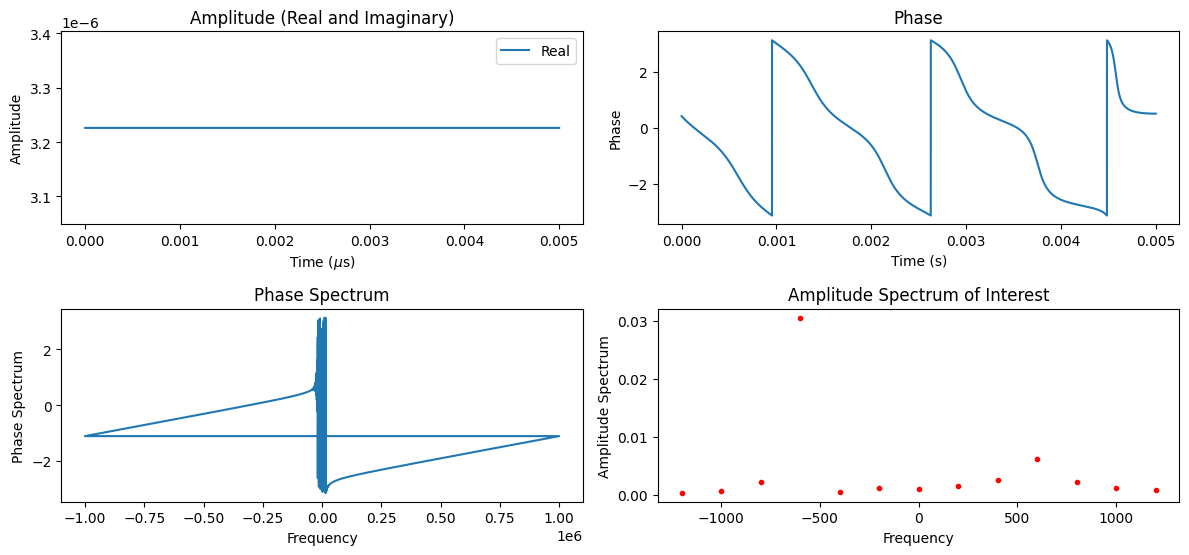

In [293]:
interest_begin=0
interest_end=10000
n=int((interest_end-interest_begin))

w = np.fft.fftfreq(n, t0[1]-t0[0])
phi_t_interest=phi_t0[interest_begin:interest_end]
A_t_interest=A_t0[interest_begin:interest_end]
amplitude_spectrum_interest,phase_spectrum_interest=fourier_transformt(A_t_interest, phi_t_interest)
plot_frequency_domain(w, t0[interest_begin:interest_end], A_t_interest, phi_t_interest, amplitude_spectrum_interest, phase_spectrum_interest)

### Concatenation

We now try to simply connnect these solution end-to-end, and study the reconstructed spectrum in longer duration. Notice that the resolution is fixed by the results. Now suppose that we want to get a solution with duration 1ms. Then there are 4000 short-time solutions concatenated with each other.

In [ ]:
phi = np.zeros(k * len(phi_t0))

for i in range(len(phi)):
    phi[i] = phi_t0[i % len(phi_t0)] / k

In [ ]:
phi_amp = np.abs(np.fft.fft(phi))

In [ ]:
target, _ = spectrum_generation(w)

In [ ]:
error = calculate_mse(target, phi_amp)

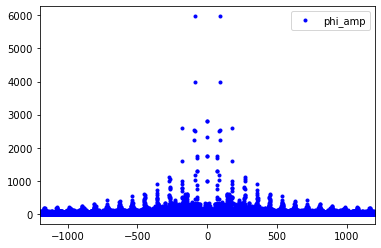

In [ ]:
freq_range = (-1200, 1200)
freq_mask = np.logical_and(w >= freq_range[0], w <= freq_range[1])

plt.plot(w[freq_mask], phi_amp[freq_mask], 'b.', label = "phi_amp")
#plt.plot(w, target[freq_mask], 'r.', label = "target")

plt.xlim([-1200, 1200])
#plt.ylim([0, 1])
plt.legend()

In [ ]:
print(error)

10249.420845573199
